In [1]:
#Transforming audio signals to the frequency domain

import numpy as np
import matplotlib.pyplot as plt 
from scipy.io import wavfile


In [2]:
# Read the audio file
sampling_freq, signal = wavfile.read('/content/drive/MyDrive/file_example_WAV_1MG.wav')
sampling_freq

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


8000

In [3]:
signal

array([[ -114,    23],
       [ -241,     3],
       [ -285,   -29],
       ...,
       [ -772, -1059],
       [ -422,  -840],
       [ -787,  -314]], dtype=int16)

In [4]:
# Normalize the values
signal = signal / np.power(2, 15)
signal

array([[-3.47900391e-03,  7.01904297e-04],
       [-7.35473633e-03,  9.15527344e-05],
       [-8.69750977e-03, -8.85009766e-04],
       ...,
       [-2.35595703e-02, -3.23181152e-02],
       [-1.28784180e-02, -2.56347656e-02],
       [-2.40173340e-02, -9.58251953e-03]])

In [5]:
# Extract the length of the audio signal
len_signal = len(signal)
len_signal

268237

In [6]:
# Extract the half length
len_half = np.ceil((len_signal + 1) / 2.0).astype(np.int)
len_half

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


134119

In [7]:
# Apply Fourier transform 
freq_signal = np.fft.fft(signal)
freq_signal

array([[-0.0027771 +0.j, -0.00418091+0.j],
       [-0.00726318+0.j, -0.00744629+0.j],
       [-0.00958252+0.j, -0.0078125 +0.j],
       ...,
       [-0.05587769+0.j,  0.00875854+0.j],
       [-0.03851318+0.j,  0.01275635+0.j],
       [-0.03359985+0.j, -0.01443481+0.j]])

In [8]:
# Normalization
freq_signal = abs(freq_signal[0:len_half]) / len_signal
freq_signal

array([[1.03531564e-08, 1.55866201e-08],
       [2.70774859e-08, 2.77601116e-08],
       [3.57240781e-08, 2.91253630e-08],
       ...,
       [1.29243798e-07, 1.75889888e-07],
       [7.71367036e-08, 1.42213687e-07],
       [1.44375335e-07, 5.90471227e-08]])

In [9]:
# Take the square
freq_signal **= 2
freq_signal

array([[1.07187847e-16, 2.42942725e-16],
       [7.33190244e-16, 7.70623798e-16],
       [1.27620975e-15, 8.48286771e-16],
       ...,
       [1.67039594e-14, 3.09372526e-14],
       [5.95007105e-15, 2.02247327e-14],
       [2.08442373e-14, 3.48656270e-15]])

In [10]:
# Extract the length of the frequency transformed signal
len_fts = len(freq_signal)
len_fts

134119

In [11]:
# Adjust the signal for even and odd cases
if len_signal % 2:
    freq_signal[1:len_fts] *= 2
else:
    freq_signal[1:len_fts-1] *= 2
freq_signal

array([[1.07187847e-16, 2.42942725e-16],
       [1.46638049e-15, 1.54124760e-15],
       [2.55241951e-15, 1.69657354e-15],
       ...,
       [3.34079188e-14, 6.18745051e-14],
       [1.19001421e-14, 4.04494653e-14],
       [4.16884745e-14, 6.97312539e-15]])

In [12]:
# Extract the power value in dB 
signal_power = 10 * np.log10(freq_signal)
signal_power

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


array([[-159.69854452, -156.14496102],
       [-148.33753327, -148.12127588],
       [-145.93047945, -147.7042731 ],
       ...,
       [-134.76150578, -132.08488262],
       [-139.24447853, -133.93087215],
       [-133.79983997, -141.56572525]])

In [13]:
# Build the X axis
x_axis = np.arange(0, len_half, 1) * (sampling_freq / len_signal) / 1000.0
x_axis

array([0.00000000e+00, 2.98243717e-05, 5.96487435e-05, ...,
       3.99992544e+00, 3.99995526e+00, 3.99998509e+00])

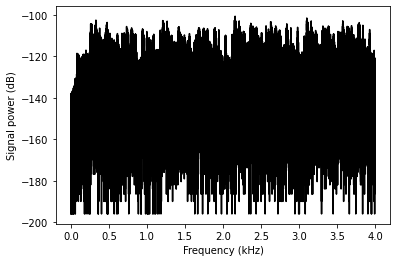

In [14]:
# Plot the figure
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()